In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import svd

In [2]:
!ls data/

big_foot.csv          bigfoot_data.json     bigfoot_data.json.zip


In [3]:
df = pd.read_csv("data/big_foot.csv")

In [4]:
df.head()

,Unnamed: 0,year,season,month,state,county,location details,nearest town,nearest road,observed,also noticed,other witnesses,other stories,time and conditions,environment,extra,date,see photos from silver star mountain,country,province
0,0,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the...",My two friends were snowmachining behind me bu...,I have not heard of any other incidents in Anc...,Middle of the night. The only light was the he...,"In the middle of the woods, in a clearing cove...",Follow-up investigation report by BFRO Investi...,NaN,NaN,NaN,NaN
1,1,2003,Winter,December,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe...","We smelled of colonge and after shave, and one...","4. Me, w-man, warren and sean. We were at my h...",no,"Started at 11, ended at about 3-3 30. Weather ...","A pine forest, with a bog or swamp on the righ...",Follow-up investigation report by BFRO Investi...,Friday night,NaN,NaN,NaN
2,2,1998,Fall,September,Alaska,Bethel County,"45 miles by air west of Lake Iliamna, Alaska i...",NaN,NaN,My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binoculars,NaN,NaN,Call Iliamna Air taxi for lat & Long of Long L...,NaN,3,NaN,NaN,NaN
3,3,2004,Summer,July,Alaska,Bristol Bay County,"Approximately 95 miles east of Egegik, Alaska....",Egegik,NaN,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...,"One other witness, and he was fishing prior to...","I've only heard of one other story, from an ol...","Approximately 12 30 pm, partially coudy/sunny.","Lake front,creek spit, gravel and sand, alder ...",Follow-up investigation report by BFRO Investi...,20,NaN,NaN,NaN
4,4,2000,Summer,June,Alaska,Cordova-McCarthy County,"On the main trail toward the glacier, before t...","Kennikot, Alaska",not sure,My hiking partner and I arrived late to the Ke...,I did hear what appeared to be grunting in the...,"I was the only witness, there was one other in...",None,About 12 00 Midnight / full moon / clear / dim...,This sighting was located at approximately 1 t...,Follow-up investigation report: Summary of com...,16,NaN,NaN,NaN


In [5]:
df.shape

(4857, 20)

In [23]:
state_counts = df['state'].value_counts()

In [21]:
state_counts

Washington        528
California        397
Florida           281
Ohio              253
Oregon            236
Illinois          219
Michigan          204
Texas             200
Missouri          129
Georgia           120
Colorado          118
Pennsylvania      108
Kentucky          108
West Virginia      98
New York           98
Alabama            91
Tennessee          89
Arkansas           87
Arizona            83
Oklahoma           82
North Carolina     79
Indiana            75
Wisconsin          74
Virginia           72
Minnesota          67
Idaho              66
New Jersey         59
Utah               57
Iowa               49
Montana            43
New Mexico         40
Kansas             39
Louisiana          39
South Carolina     38
Maryland           34
Wyoming            27
Massachusetts      26
Mississippi        21
Alaska             20
Nebraska           14
Connecticut        11
New Hampshire      11
South Dakota       11
Maine              10
Vermont             8
Nevada    

In [89]:
state_df = pd.DataFrame(state_counts)
state_df.head()

,state
Washington,528
California,397
Florida,281
Ohio,253
Oregon,236


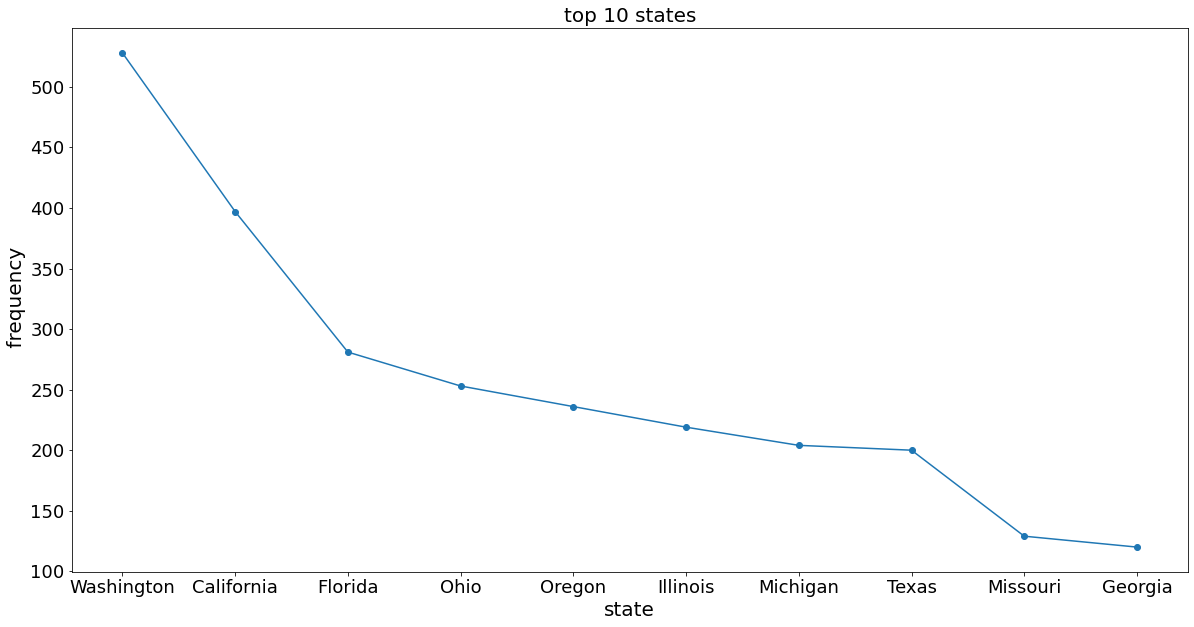

In [124]:
top_nums = 10
x = state_counts.index.tolist()
fig, ax =plt.subplots(figsize=(20,10))
ax.plot(x[:top_nums],state_df.iloc[:top_nums,:])
ax.scatter(x[:top_nums],state_df.iloc[:top_nums,:])
ax.set_xlabel('state', fontsize=20) 
ax.set_ylabel(' frequency', fontsize=20)
ax.set_title('top 10 states', fontsize=20)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.savefig('top_10_states')

In [114]:
month_counts = df['month'].value_counts()
month_df = pd.DataFrame(month_counts)

month_df['month_nums'] =[8,7,10,9,11,6,5,4,1,12,3,2]
month_df.columns = ['month_counts','month']
month_df

,month_counts,month
August,575,8
July,563,7
October,560,10
September,469,9
November,405,11
June,394,6
May,258,5
April,227,4
January,205,1
December,202,12


In [129]:
month_df=month_df.sort_values('month')

In [122]:
year_counts = df['year'].value_counts()
year_df = pd.DataFrame(year_counts)
year_df.head(10)

,year
2004,192
2006,188
2005,187
2000,186
2012,179
2001,168
2003,149
2008,147
2002,137
2011,134


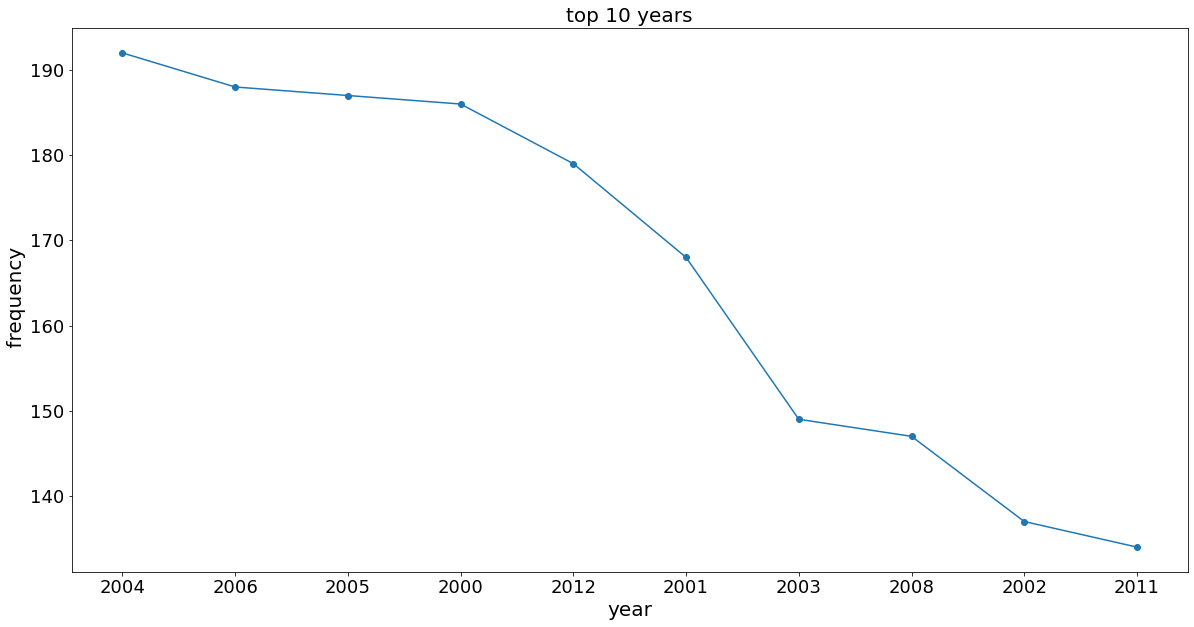

In [125]:
top_nums = 10
x = year_df.index.tolist()
fig, ax =plt.subplots(figsize=(20,10))
ax.plot(x[:top_nums],year_df.iloc[:top_nums,:])
ax.scatter(x[:top_nums],year_df.iloc[:top_nums,:])
ax.set_xlabel('year', fontsize=20) 
ax.set_ylabel(' frequency', fontsize=20)
ax.set_title('top 10 years', fontsize=20)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.savefig('top_10_years')